In [17]:
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data=pd.read_csv("./creditcard.csv")

In [19]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
data.shape

(284807, 31)

In [22]:
target=data['Class']

In [23]:
features=data.drop('Class',axis=1)

In [24]:
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [25]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
standardised_data=StandardScaler().fit_transform(features)
standardised_data.shape

(284807, 30)

In [27]:
from sklearn.manifold import TSNE

In [ ]:
model=TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(features)

In [15]:
tsne_data=np.vstack((tsne_data.T,target)).T

In [16]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","target"))

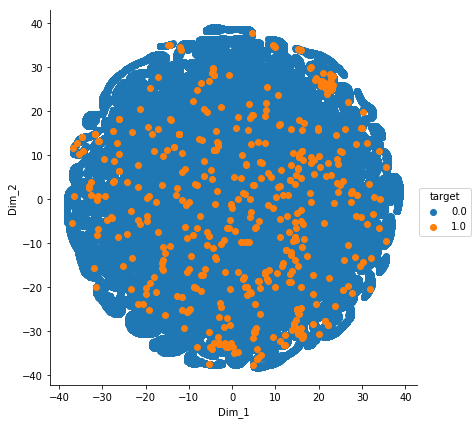

In [20]:
import seaborn as sns
sns.FacetGrid(tsne_df,hue='target',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()

In [ ]:
# There are few of the clusters formed for default perplexity

In [23]:
model=TSNE(n_components=2,random_state=0,perplexity = 50)
tsne_data = model.fit_transform(features)

In [25]:
tsne_data=np.vstack((tsne_data.T,target)).T

In [26]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","target"))

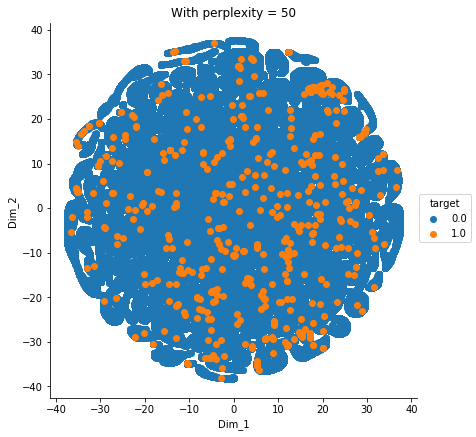

In [27]:
sns.FacetGrid(tsne_df,hue='target',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('With perplexity = 50')

In [ ]:
# A few good clusters have started forming when the perplexity is increased

In [49]:
features=features[0:5000]
target=target[0:5000]

In [50]:
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [51]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [52]:
model=TSNE(n_components=2,random_state=0,perplexity = 50,n_iter=5000)

In [53]:
tsne_data = model.fit_transform(features)

In [54]:
tsne_data=np.vstack((tsne_data.T,target)).T

In [55]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","target"))

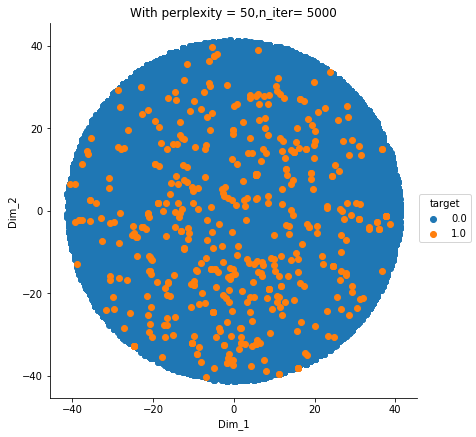

In [32]:
import seaborn as sns
sns.FacetGrid(tsne_df,hue='target',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('With perplexity = 50,n_iter= 5000')

In [ ]:
# There are few of the clusters formed for perplexity=50 when iterations are increased to 5000

In [33]:
model=TSNE(n_components=2,random_state=0,perplexity = 2)

In [34]:
tsne_data = model.fit_transform(features)

In [40]:
target=data['Class']
target=target[0:5000]

In [41]:
tsne_data=np.vstack((tsne_data.T,target)).T

In [42]:
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","target"))

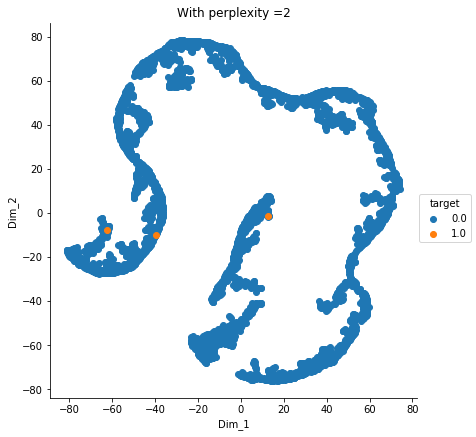

In [43]:
sns.FacetGrid(tsne_df,hue='target',size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.title('With perplexity =2')

In [ ]:
# The output is completely irregular for perplexity = 2. 
# When we decrease the perplexity then the structure formed is completely absurbed